In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\mushrooms (1).csv")

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
fv=df.drop('class',axis=1)

In [8]:
fv

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [9]:
label_encoder=LabelEncoder()


In [10]:
for column in fv.columns:
    fv[column] = label_encoder.fit_transform(fv[column])

In [11]:
fv

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [12]:
(df.isna().sum()) #/ len(df)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [13]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [14]:
(df.columns)


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [15]:
cv=df.iloc[:,0]


In [16]:
cv

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [17]:
cv=cv.map({"p":0,"e":1})


In [18]:
cv

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

In [19]:
scaler=StandardScaler()


In [20]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=143,stratify=cv)


In [21]:
x_train=scaler.fit_transform(x_train)


In [22]:
x_test=scaler.transform(x_test)


In [23]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('knn', KNeighborsClassifier())  # KNN classifier
])

logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('logistic', LogisticRegression())  # Logistic regression classifier
])

svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('svc', SVC())  # Support Vector Classifier
])


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Define parameter grids for each classifier
knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7],  # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weight function
    'knn__metric': ['euclidean', 'manhattan']  # Distance metric
}

logistic_param_grid = {
    'logistic__C': [0.1, 1, 10],  # Regularization parameter
    'logistic__solver': ['liblinear', 'saga']  # Solver for optimization
}

svc_param_grid = {
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf'],  # Kernel type
    'svc__gamma': ['scale', 'auto']  # Kernel coefficient
}

# Define scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
            'f1_score':make_scorer(f1_score),
            'ruc':make_scorer(roc_auc_score)
            }

# Perform GridSearchCV for each classifier
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring=scoring, refit='accuracy')
logistic_grid_search = GridSearchCV(logistic_pipeline, logistic_param_grid, cv=5, scoring=scoring, refit='accuracy')
svc_grid_search = GridSearchCV(svc_pipeline, svc_param_grid, cv=5, scoring=scoring, refit='accuracy')

# Fit the grid search objects to the data
knn_grid_search.fit(x_train, y_train)
logistic_grid_search.fit(x_train, y_train)
svc_grid_search.fit(x_train, y_train)

# Get the best parameters and best score for each classifier
print("Best parameters for KNN:", knn_grid_search.best_params_)
print("Best score for KNN:", knn_grid_search.best_score_)

print("Best parameters for Logistic Regression:", logistic_grid_search.best_params_)
print("Best score for Logistic Regression:", logistic_grid_search.best_score_)

print("Best parameters for SVC:", svc_grid_search.best_params_)
print("Best score for SVC:", svc_grid_search.best_score_)


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best parameters for KNN: {'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Best score for KNN: 1.0
Best parameters for Logistic Regression: {'logistic__C': 10, 'logistic__solver': 'liblinear'}
Best score for Logistic Regression: 0.9663029549357495
Best parameters for SVC: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best score for SVC: 1.0


In [25]:
knn_grid_search.cv_results_

{'mean_fit_time': array([0.00809412, 0.0099793 , 0.00884905, 0.01246824, 0.00809541,
        0.0115664 , 0.00487947, 0.00816989, 0.00656748, 0.0065279 ,
        0.00652223, 0.00653462]),
 'std_fit_time': array([5.12704707e-03, 3.18139961e-03, 1.36079578e-03, 2.63304376e-03,
        8.49266389e-05, 6.60220002e-03, 6.53968230e-03, 1.61410399e-04,
        3.28427291e-03, 3.26539946e-03, 3.26235480e-03, 3.26755132e-03]),
 'mean_score_time': array([0.33218174, 0.16517749, 0.28049269, 0.18296194, 0.26250072,
        0.1579875 , 0.2860116 , 0.21724792, 0.28812389, 0.22122302,
        0.28631644, 0.21968999]),
 'std_score_time': array([0.09391873, 0.00590989, 0.01206311, 0.01466441, 0.02047101,
        0.00336787, 0.01319198, 0.01277204, 0.01516091, 0.01303157,
        0.01446721, 0.01229867]),
 'param_knn__metric': masked_array(data=['euclidean', 'euclidean', 'euclidean', 'euclidean',
                    'euclidean', 'euclidean', 'manhattan', 'manhattan',
                    'manhattan', 'man

In [26]:
logistic_grid_search.cv_results_

{'mean_fit_time': array([0.03763671, 0.07954879, 0.05054522, 0.24984798, 0.07327962,
        0.25155644]),
 'std_fit_time': array([0.01431396, 0.0195641 , 0.0061388 , 0.003482  , 0.00716893,
        0.01854675]),
 'mean_score_time': array([0.00647998, 0.00490975, 0.00816431, 0.00649166, 0.00812078,
        0.0064208 ]),
 'std_score_time': array([6.07138574e-03, 4.00881768e-03, 7.28312239e-03, 3.24642265e-03,
        6.47293050e-05, 3.21115514e-03]),
 'param_logistic__C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_logistic__solver': masked_array(data=['liblinear', 'saga', 'liblinear', 'saga', 'liblinear',
                    'saga'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'logistic__C': 0.1, 'logistic__solver': 'liblinear'},
  {'logistic__C': 0.1, 'logistic__solver': 'saga'},
 

In [27]:
svc_grid_search.cv_results_

{'mean_fit_time': array([0.31689024, 0.3566143 , 0.29853883, 0.35409799, 0.50938268,
        0.20886178, 0.50862598, 0.1562573 , 1.65327029, 0.14171166,
        1.65236154, 0.13346777]),
 'std_fit_time': array([0.0262569 , 0.01148644, 0.00399494, 0.00378146, 0.04877758,
        0.02864281, 0.04646738, 0.0032359 , 0.15919402, 0.0083882 ,
        0.15234416, 0.00647784]),
 'mean_score_time': array([0.03246408, 0.15441675, 0.03743877, 0.16142669, 0.0309238 ,
        0.07201791, 0.03413472, 0.05687304, 0.02601576, 0.04544911,
        0.02760358, 0.04869809]),
 'std_score_time': array([5.89968014e-05, 3.43199264e-04, 3.94134872e-03, 5.56064865e-03,
        3.33634894e-03, 7.36714052e-03, 3.18413390e-03, 1.82800573e-04,
        7.90719427e-03, 3.93074591e-03, 6.54058160e-03, 5.17521927e-03]),
 'param_svc__C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, 

In [28]:
svc=SVC()
model=svc.fit(x_train,y_train)


In [33]:
import pickle

In [34]:
from pickle import dump

In [35]:
pickle.dump(svc_grid_search,open(r"C:\Users\ADMIN\Documents\picklw\NB.pickle","wb"))

In [29]:
def predict_with_svc(query_point, scaler, svc_model):
    # Scale the query point using the same scaler used for training
    scaled_query_point = scaler.transform(query_point)

    # Make predictions using the SVC model
    svc_prediction = svc_model.predict(scaled_query_point)

    # Return the prediction
    return svc_prediction

# Example query point
query_point_encoded = [[2, 2, 4, 1, 6, 1, 0, 1, 4, 0, 0, 2, 2, 7, 7, 0, 2, 1, 4, 2, 3, 5]]

# Make predictions using the function
svc_pred = predict_with_svc(query_point_encoded, scaler, model)

# Display the prediction
print("SVC Prediction:", svc_pred)


SVC Prediction: [0]


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Visualization

### Bar Chart: Show the distribution of classes in the dataset to understand class imbalance.



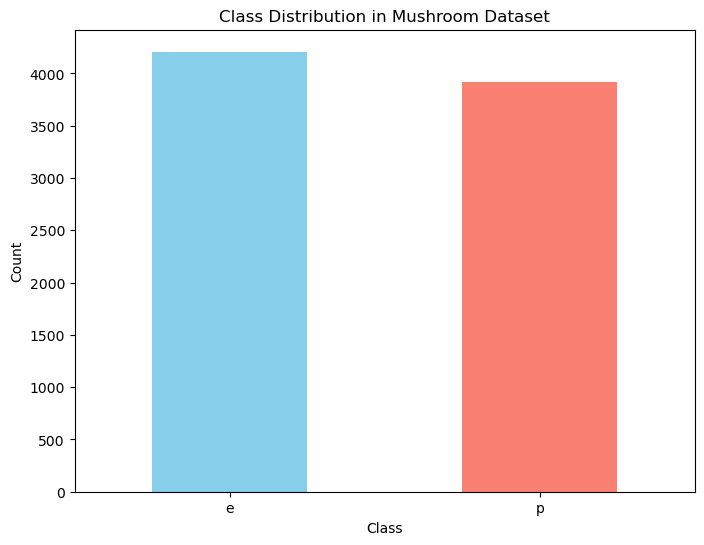

In [25]:
class_distribution = df['class'].value_counts()

plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution in Mushroom Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Pie Chart: Display the class distribution in a visually appealing way.

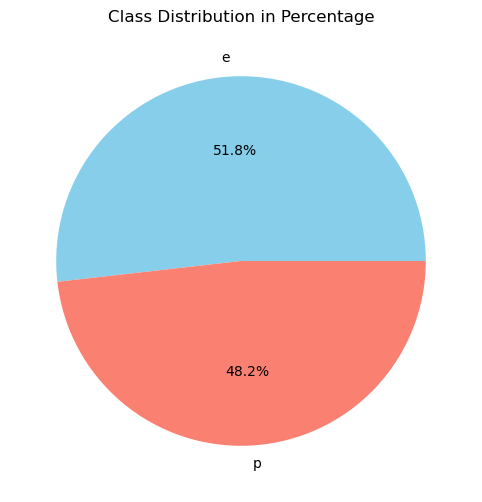

In [101]:
# Assuming 'df' is your DataFrame containing the mushroom data
# and 'class' is the column containing the class labels
class_distribution = df['class'].value_counts()

plt.figure(figsize=(8, 6))
class_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Class Distribution in Percentage')
plt.ylabel('')
plt.show()

In [39]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [28]:
df_habitat = df['habitat'].groupby(df['class']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()
df_habitat

,class,habitat,frequency
0,e,d,0.446768
1,e,g,0.334601
2,e,m,0.060837
3,e,l,0.057034
4,e,w,0.045627
5,e,p,0.032319
6,e,u,0.022814
7,p,d,0.323800
8,p,p,0.257406
9,p,g,0.188968


### Bar Chart: for showing the habitat distribution

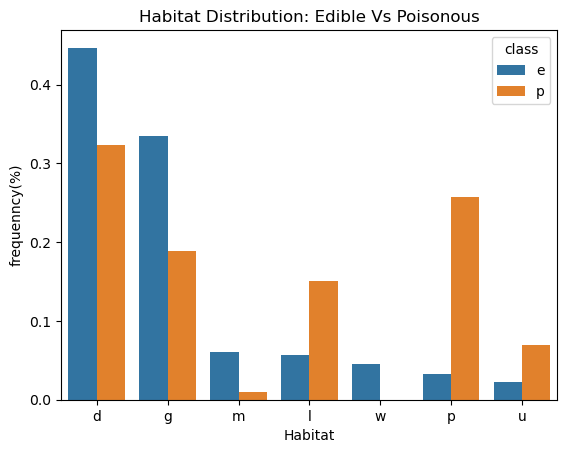

In [29]:
# Let`s create a bar plot to show the Habitat Distribution
sns.barplot(data = df_habitat,x='habitat',y='frequency',hue='class')
plt.xlabel('Habitat')
plt.ylabel('frequenncy(%)')
plt.title("Habitat Distribution: Edible Vs Poisonous");

In [30]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

### Histogram: Show the distribution of numerical features in the dataset.

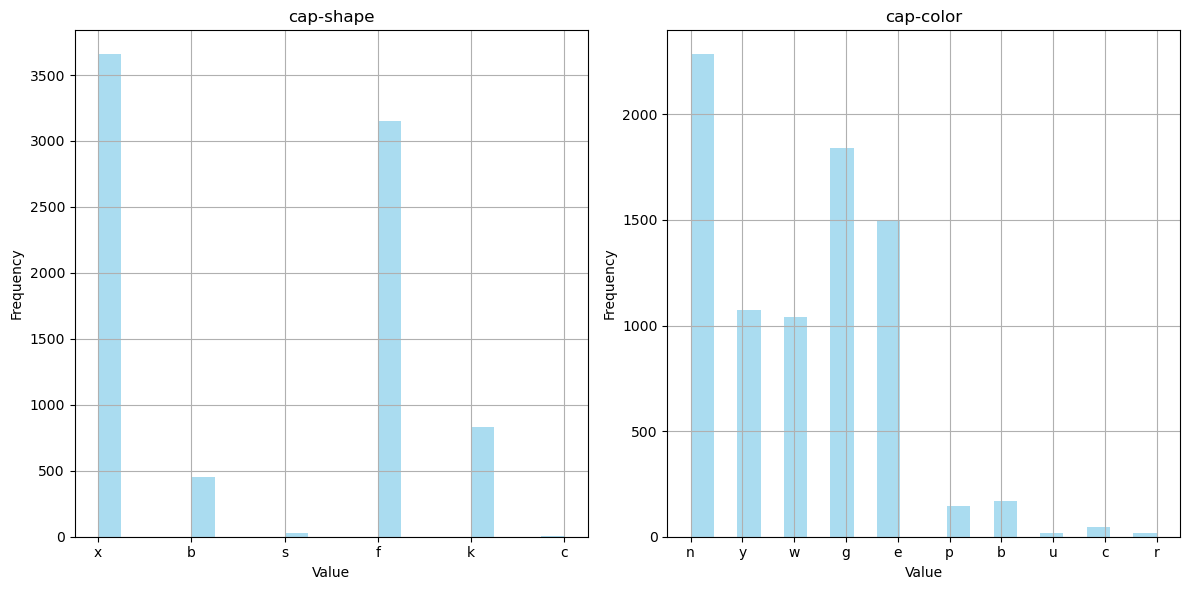

In [115]:
# Assuming 'df' is your DataFrame containing the mushroom data
# and 'numerical_features' is a list of columns containing numerical features
numerical_features = ['cap-shape', 'cap-color'
       ]

plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    df[feature].hist(color='skyblue', bins=20, alpha=0.7)
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [85]:
fv.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [92]:
df.select_dtypes(include="int").columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [91]:
# Assuming df is your DataFrame
for col in df.columns:
    df[col] = df[col].astype('category').cat.codes.astype("int32")


In [77]:
fv

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


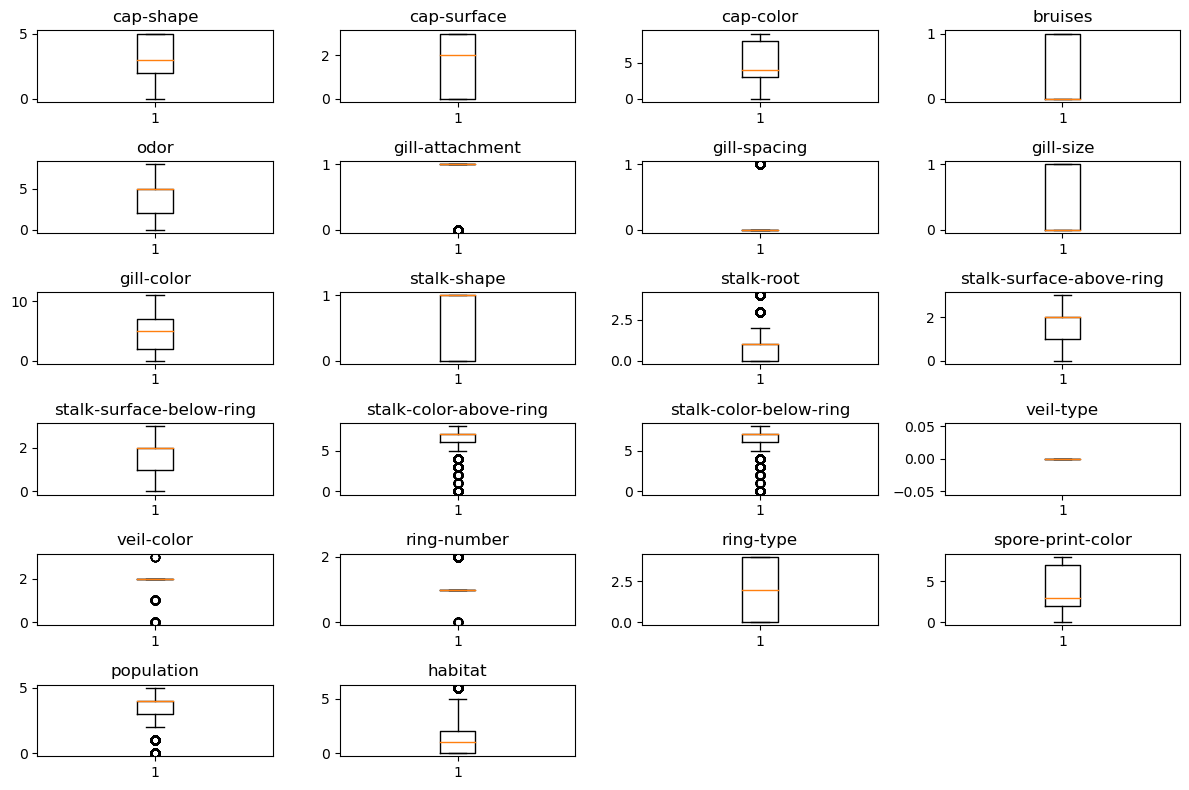

In [96]:
import matplotlib.pyplot as plt

# Calculate the number of rows and columns for the subplot grid
num_cols = len(fv.columns)
num_rows = (num_cols - 1) // 4 + 1

plt.figure(figsize=(12, 8))
for i, col in enumerate(fv.columns):
    plt.subplot(num_rows, 4, i+1)  # Dynamically calculate the subplot position
    plt.boxplot(fv[col])
    plt.title(col)

plt.tight_layout()
plt.show()


### Confusion Matrix: Display the model's performance by showing the number of correct and incorrect predictions for each class.

In [33]:
from sklearn.tree import DecisionTreeClassifier

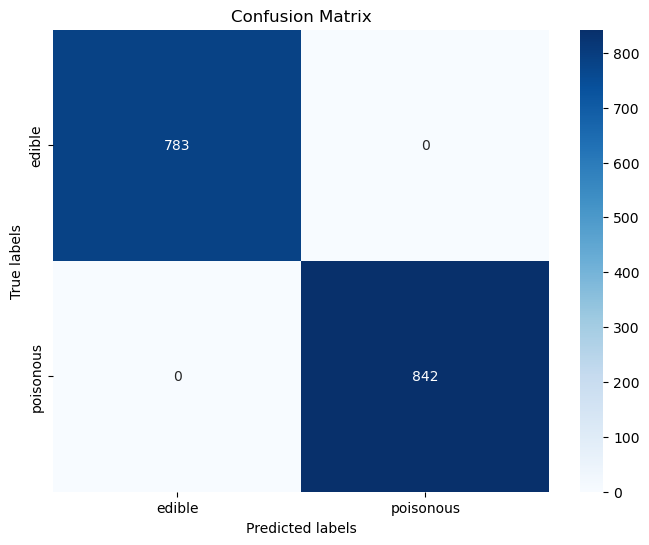

In [34]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### ROC Curve: Show the trade-off between true positive rate and false positive rate for different thresholds of the classifier.

In [35]:
from sklearn.metrics import roc_curve, auc

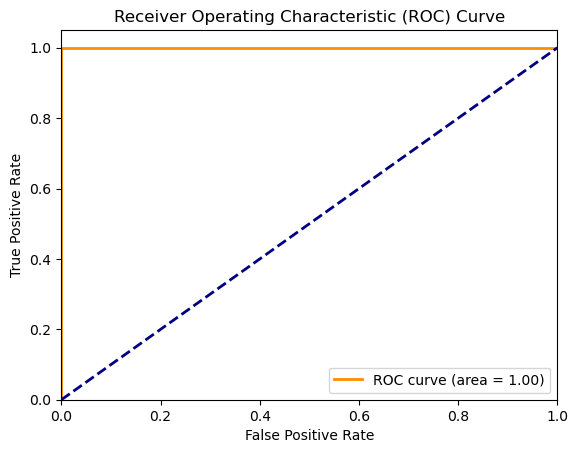

In [36]:
y_pred_proba = clf.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Attribute Information: (classes: edible=e, poisonous=p)¶
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d